# Курс "Практикум по математической статистике"
# 3 курс ФПМИ МФТИ, осень 2023
## Домашнее задание 1. Cвойства и сравнение оценок
### Дедлайн --- 10 октября 23:59

Это первое обязательное домашнее задание нашего курса. Мы предлагаем выполнять задания прямо в этом ноутбуке. Пожалуйста, не стирайте условия задач.

Информация о выполнении и курсе в целом есть в чате курса https://t.me/+IHdLycZDD5g5MDQy.

Информация о способе сдачи домашнего задания будет позже.

---

В этом и последующих заданиях вам потребуется выполнять генерацию случайных величин из некоторого распределения, моделирование оценок параметров и проверку их теоретических свойств на практике. Для этого вам понадобится библиотека scipy.stats. Мы настоятельно рекомендуем для генерации выборок использовать именно эту библиотеку.

Настоятельно рекомендуемая форма оформления домашних заданий — это Jupyter Notebook и его pdf-версия с:

* условием задачи,
* решением (если требуется некоторый теоретический вывод),
* описанием плана решения, который потом реализуется в коде,
* собственно кодом,
* построенными графиками (если это требуется) и **выводом**, который как правило должен заключаться в объяснении практических результатов с использованием теоретических фактов. ***Вывод требуется даже в том случае, если в условии об этом явно не сказано!***
* некоторыми другими вещами, если об этом будет указано в задании.

Оценка за каждую задачу складывается из правильного выполнения всех этих пунктов. Закрывая на них глаза, вы сознательно понижаете свою оценку.

Каждая задача оценивается в 10 баллов.

In [2]:
# Matplotlib needed to correctly display suptitles,
# as well as some other minor things.
# I thought I might as well ensure everything is up to date
%pip install --upgrade matplotlib numpy scipy statsmodels

  Using cached numpy-1.26.0-cp310-cp310-macosx_11_0_arm64.whl (14.0 MB)
  Using cached scipy-1.11.3-cp310-cp310-macosx_12_0_arm64.whl (29.8 MB)
  Using cached statsmodels-0.14.0-cp310-cp310-macosx_11_0_arm64.whl (9.4 MB)
  Using cached patsy-0.5.3-py2.py3-none-any.whl (233 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/consol

In [2]:
from __future__ import annotations
import typing
import abc
import dataclasses
import itertools

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps
import seaborn as sns

sns.set(style='darkgrid')
%matplotlib inline

**Зафиксируем** `seed` для воспроизводимости.

In [4]:
np.random.seed(42)

**Условие задания**: Аспект-Император трёх морей Анасуримбор Келлхус спустя 20 лет с момента объединения Новой Империи объявляет начало Великой Ордалии --- похода против крепости Голготтерат. Поход займёт более, чем пол года путешествия сквозь безжизненные населённые дикими монстрами пустоши, в связи с чем Келлхус отдаёт приказ всем провинциям выдать провизию для похода, а имперским математикам, коим принадлежите Вы --- сосчитать, каждый ли правитель провинции выполнил приказ качественно.

В этой практике Вам придётся оценить число материальных ресурсов, предоставленных каждой из тысячи провинций, лучшим образом и предоставить отчёт, чему равно мат. ожидание числа ресурсов и почему Ваш способ оценивания хорош. Будем надеяться, что в среднем все короли добросовестно выполнили приказ.

**Гайд, как моделировать оценки**:

В разных задачах Вы будете видеть ключевое слово "смоделируйте". Для моделирования оценки необходимо сгенерировать большое число выборок из одного распределения, построить по каждой из выборок оценку и получить выборку оценок. Далее по выборке оценок можно построить гистограмму или эмпирическую функцию распределения, и сделать выводы о распределении оценок.

Как мы знаем по теореме Гливенко-Кантелли, эмпирическая функция распределения сходится к реальной, и, при некоторых условиях, гистограмма сходится к плотности, если она существует.

### Задача 1

Известно, что количество урожая каждой Нансурской провинции в год подчиняется распределению $U[0, 2]$ в тоннах. Некоторые короли решают оставить существенную часть урожая, мимикрируя под $U[0, \theta]$ для $\theta < 2$. Нужно предложить метод оценки $\theta$. Если значение оценки будет меньше 2, приказ будет считаться невыполненным.

Сгенерируйте N выборок $X_1, \dots, X_N$ из равномерного распределения на отрезке $[0, \theta]$ для $N = 10^4$.

In [20]:
N = 1e4  # use this
N = int(N)
theta = 1
X = sps.uniform(0, theta).rvs(N)

Для всех $N$ выборок посчитайте оценки параметра $\theta$ из теоретической задачи: $2\overline{X}, \; \overline{X} + X_{(n)}/ 2, \; (n+1)X_{(1)}, \; X_{(1)}+X_{(n)}, \; \frac{n+1}{n} X_{(n)}$. Используйте векторные операции.

При помощи моделирования выясните, какие оценки точнее, чем другие. Для этого постройте для разных $\theta$ распределение каждой из оценок. Какая оценка предпочтительнее? Почему? Как это согласуется с принципом среднеквадратичного подхода к сравнению оценок? Посчитайте точный и эмпирический риск каждой из них: $\hat{R}_{\theta}(\theta^*, \theta) = \frac{1}{n}\sum (\theta^*(S) - \theta)^2$, где $S$ это выборка и сравните их. Верны ли условия теоремы Рао-Крамера для данного семейства распределений? Существует ли эффективная оценка для равномерного распределения? Сделайте выводы о том, как эмпирический риск связан с теоретическим.

__Подсказка:__ Могут быть полезными функции `np.arange`, `np.cumsum`, `np.maximum.accumulate` и `np.minimum.accumulate`

Пусть теперь $\theta$ само приходит из равномерного распределения $U[0, 1]$. При помощи моделирования посчитайте эмпирический риск в байесовском подходе к сравнению оценок и сравните оценки. Сохранится ли порядок оценок по качеству? Почему?

Постройте на одном графике разными цветами для всех оценок эмпирическую функцию распределения или гистограмму (аналог эмпирической плотности). Если некоторые оценки сильно отличаются от истинного значения параметра $\theta$, то исключите их и постройте еще один график со всеми кривыми (или бинами гистограммы). Для избавления от больших значений разности в начале ограничьте масштаб графика. Для наглядности точки можно соединить линиями.

Не забудьте подписать оси, а также добавить легенду к графику.

Какая оценка получилась лучше? Как Вы это поняли?

__Ответ:__


Проведите эксперимент для разных значений $\theta$ (количество графиков равно количеству значений $\theta$)

Сделайте вывод.


__Вывод:__

### Задача 2

Конрийские провинции известны своими пастбищами и скотоводами. Принц Нерсей Пройас замерил, что количество скота подчиняется экспоненциальному распределению с параметром $\lambda = 1$ (в тысячах голов). Для подсчёта оценки параметра есть семейство оценок $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$, каждая следующая из которых требует большего числа операций на вычисление. Стоит ли оно того? Это и нужно выяснить.

Сгенерируйте $N$ выборок $X_1, ..., X_N$ из экспоненциального распределения с параметром $\theta = 1$ для $N = 10^4$.

In [21]:
np.random.seed(42)

Для всех выборок посчитайте оценку $(\frac{k!}{\overline{X^k}})^{\frac{1}{k}}$ параметра $\theta$. Проведите исследование, аналогичное предыдущей задаче, и выясните, при каком k оценка ведет себя лучше (рассмотрите не менее $10$ различных значений $k$). Являются ли данные оценки асимптотически нормальными? Проверьте это теоретически и моделированием (постройте эмпирическую функцию/плотность распределения статистики $\sqrt{n}(\theta^* - \theta)$). Посчитайте дисперсию оценок для разных $k$ и разных размеров выборки. Сходится ли она к теоретической? Что Вы можете сказать о скорости сходимости?

Сделайте вывод.


__Вывод:__

### Задача 3

Кианские провинции до сих пор надеются отделиться от Новой Империи, и поэтому планируют саботировать Ордалию. К их счастью, число урожая в пустынных землях на юге подчиняется распределению Коши, которое отличается существенно от двух распределений из задач 1 и 2. Чем отличается? Как это повлияет на оценивание его параметра сдвига?

Для распределения Коши моделированием изучите поведение оценки параметра сдвига при помощи среднего и медианы. У какой из этих оценок лучше асимптотические свойства? Как это обосновывается теоретическими свойствами оценок? Моделированием проверьте, какие оценки состоятельны и асимптотически нормальны. Сравните результат с теоретическим.

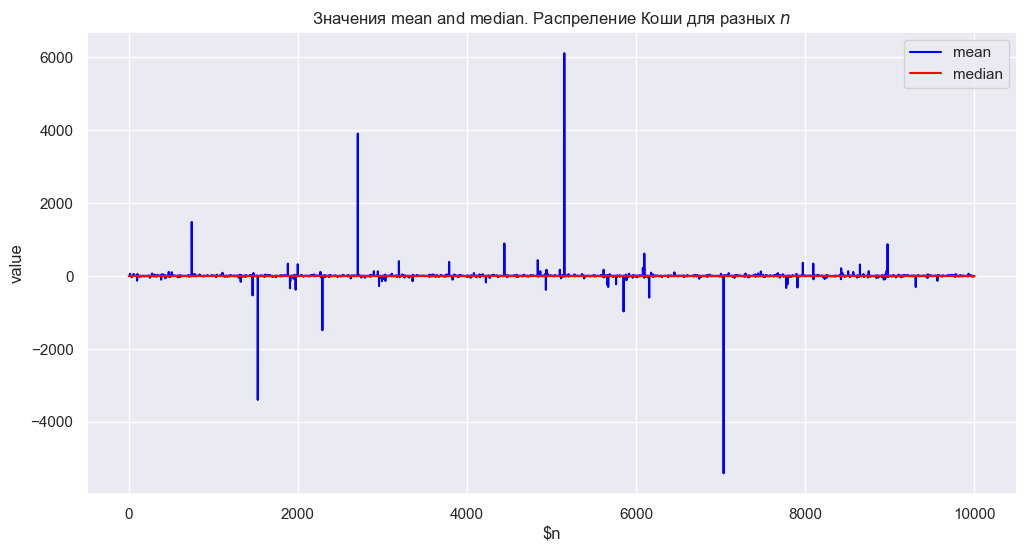

In [173]:
grid = np.arange(1, 1e4)
X = [sps.cauchy.rvs(size=int(k)) for k in grid]
median = [np.median(i) for i in X]
mean = [np.mean(i) for i in X]

plt.figure(figsize=(12, 6))
plt.plot(grid, mean, label='mean', color='blue')
plt.plot(grid, median, label='median', color='red')
plt.legend()
plt.xlabel('$n')
plt.ylabel('value')
plt.title('Значения mean and median. Распреление Коши для разных $n$')
plt.show()

**Вывод:** Из теории медианная оценка является сильно состоятельной и асимптотически нормальной, а оценка средним нет.
Из графика видно, что оценка средним хуже асимптотически, чем медианная оценка.

Теперь попробуем постороить гистрограмму по медианной оцнеки и посмотрим, насколько сильно она будет сопадать
с истинным графиком распредления Коши.

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_47242/1617727470.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=median, label=f'sample std = {np.round(np.std(median), 2)}')


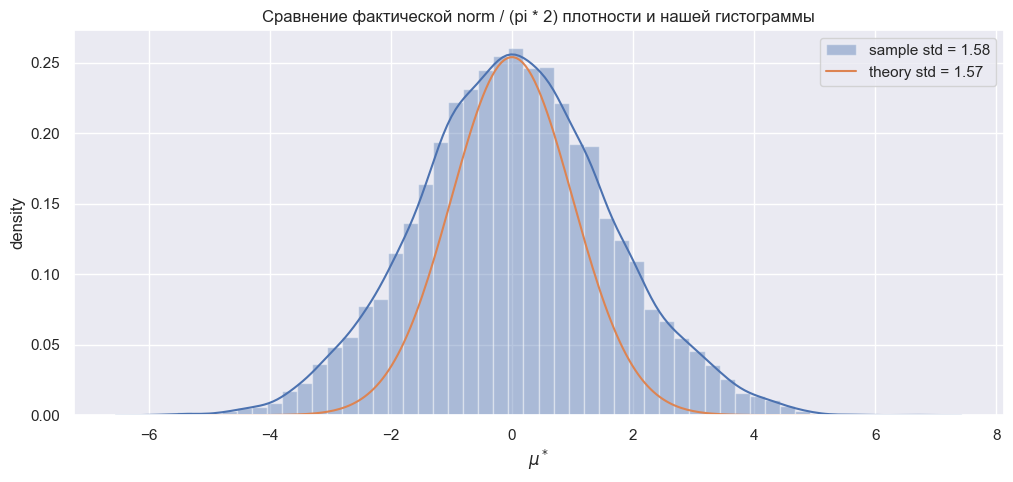

In [23]:
grid = np.arange(1, 10 ** 4)
s = np.linspace(-5, 5, 200)

X = [sps.cauchy.rvs(size=int(k)) for k in grid]
median = [np.sqrt(len(i)) * np.median(i) for i in X]

plt.figure(figsize=(12, 5))
sns.distplot(x=median, label=f'sample std = {np.round(np.std(median), 2)}')
plt.plot(s, sps.norm.pdf(s) / np.pi * 2, label=f'theory std = {np.round(np.pi / 2, 2)}')
plt.ylabel('density')
plt.xlabel(r'$\mu^*$')
plt.title('Сравнение фактической norm / (pi * 2) плотности и нашей гистограммы')
plt.legend()
plt.show()


Изучите эмпирическое распределение выборочной дисперсии для распределения Коши и проверьте состоятельность оценки.

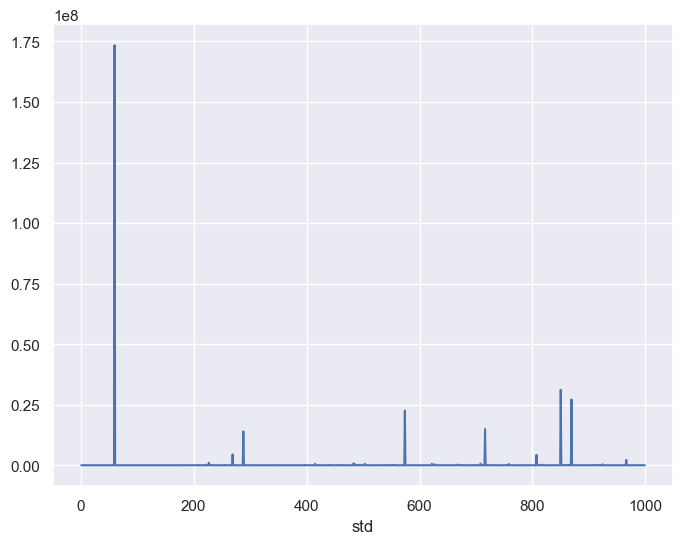

In [33]:
grid = np.arange(1, 10 ** 3)
X = [sps.cauchy.rvs(size=i) for i in grid]
std = [np.std(i)**2 for i in X]

plt.figure(figsize=(8, 6))
sns.lineplot(x=grid, y=std)
plt.xlabel('n')
plt.xlabel('std')
plt.show()

**Вывод:**
Исходя из проведенных тестов, очевидно, что медиана - наилучшая оценка для распределния Коши

### Задача 4

Древние свитки из Сареотской библиотеки хранят знания двух древних волшебников севера --- Гливенко и Кантелли. Два мага-гностика придумали ультимативный способ оценивания распределений количества чего угодно. Их способом пользовались короли севера ещё две тысячи лет назад, во времена Первой Ордалии. Аспект-Император отдал приказ проверить, верны ли их выкладки до сих пор.

Сгенерируйте $N$ выборок $X_1,\dots, X_N$ из стандартного нормального распределения для $N = 10^4$.

In [22]:
np.random.seed(42)
X = sps.norm().rvs(N)

Для всех $n \leqslant N$ первой выборки посчитайте эмпирическую функцию распределения.


In [23]:
from statsmodels.distributions.empirical_distribution import ECDF  # can be useful, but not necessary
ecdf = list()
for i in range(N):
    ecdf.append(ECDF(X[0:i + 1]))

Для некоторых n (например, $n \in \{10,25,50,100,1000,N\}$ постройте графики эмпирической функции распределения (отметьте на оси абсцисс точки "скачков" кривых, нанеся каждую из "подвыборок" на ось абсцисс на каждом соответствующем графике с коэффициентом прозрачности `alpha=0.2`), нанеся на каждый из них истинную функцию распределения (количество графиков равно количеству различныз значений $n$).

Проверьте выполнение теоремы Гливенко-Кантелли.

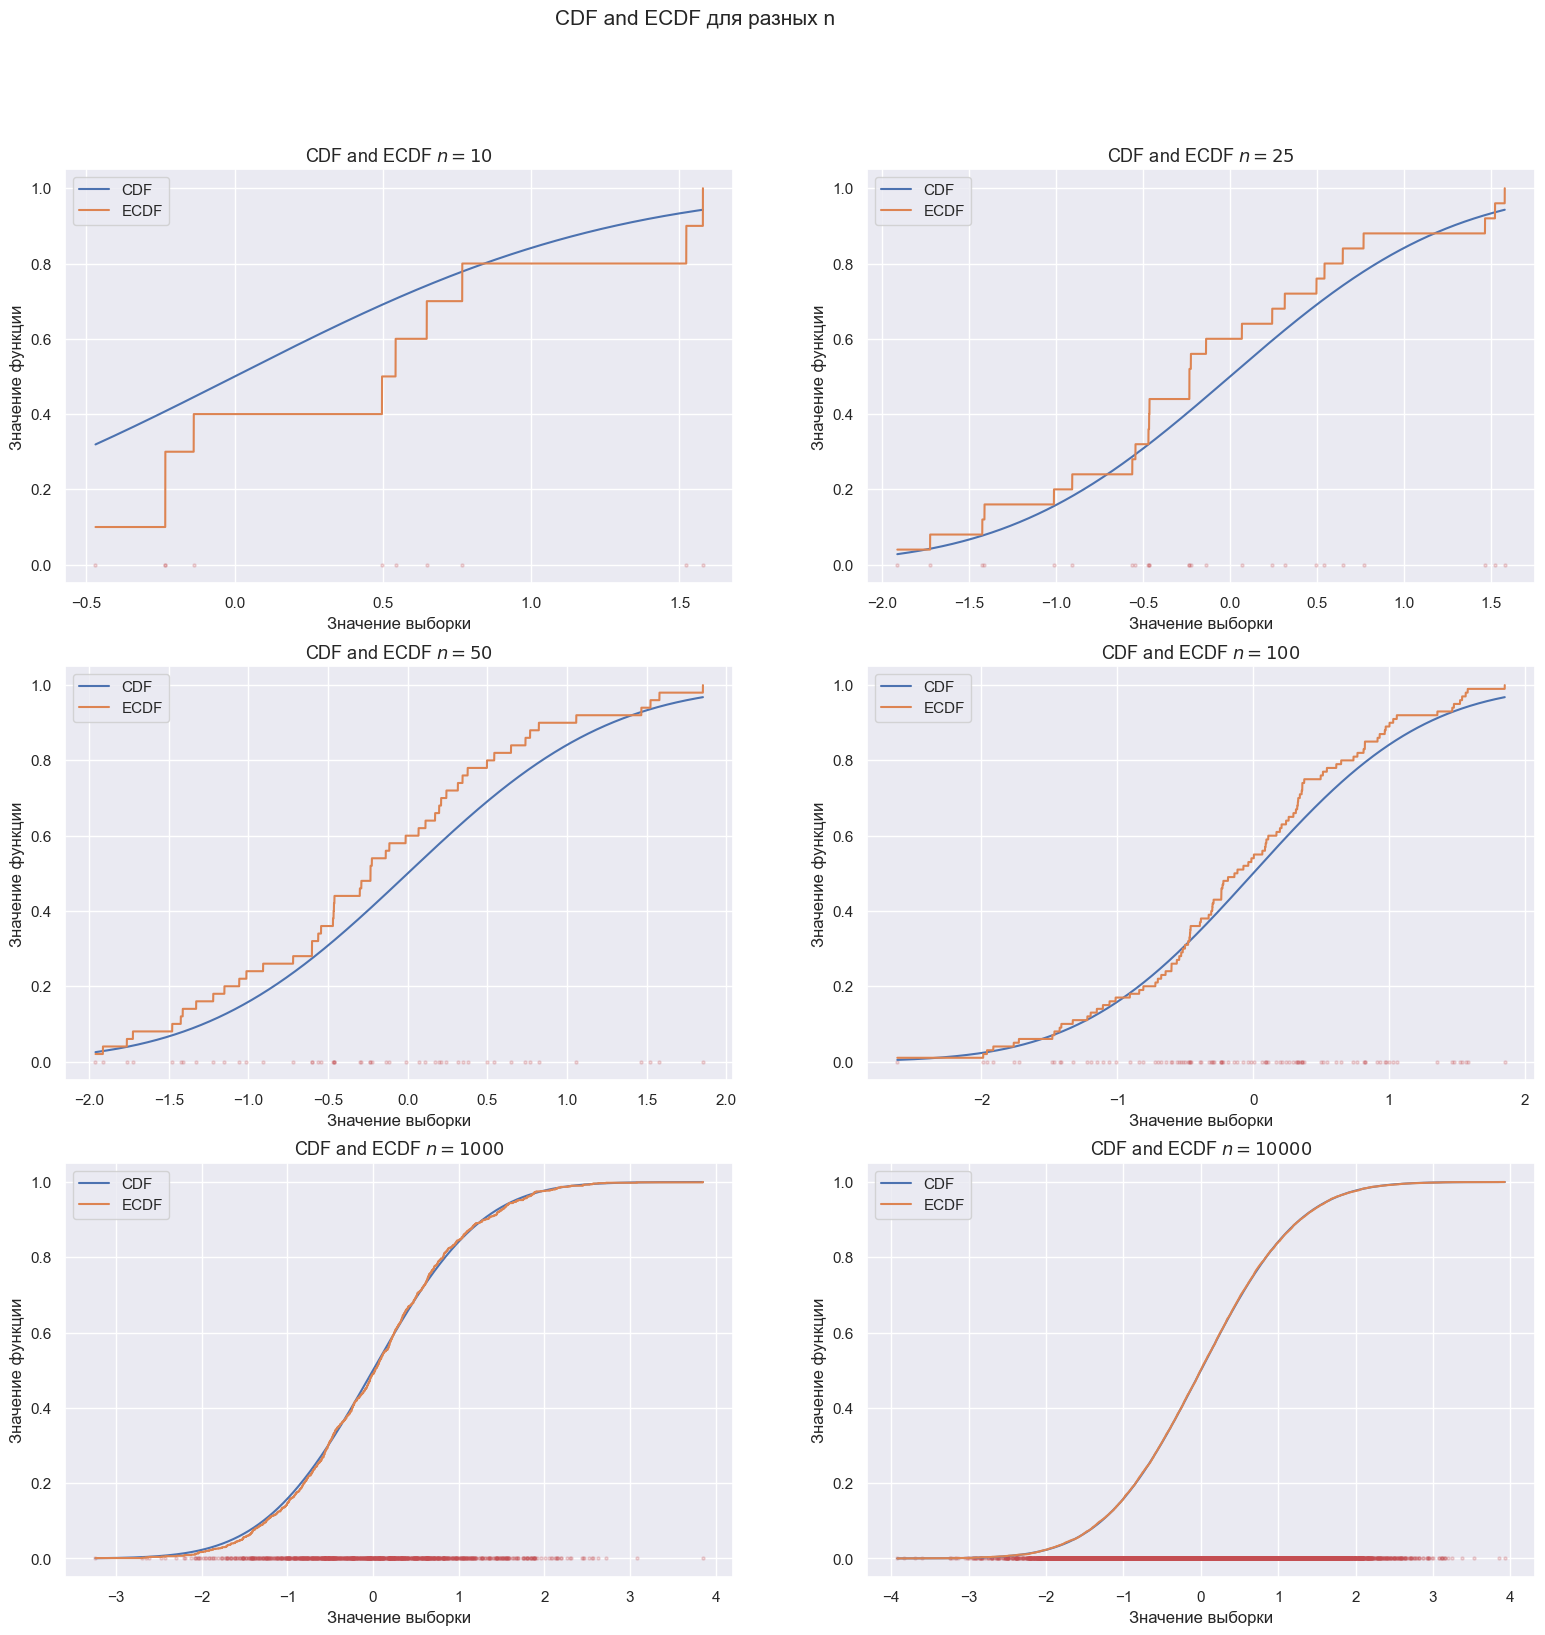

In [97]:
n_grid = [10, 25, 50, 100, 1000, N]
i = 1
plt.figure(figsize=(21, 16))
for n in n_grid:
    y_value = np.full(shape=n,fill_value=0)
    x_grid = np.linspace(min(X[0:n]), max(X[0:n]), N)
    
    plt.subplot(3, 2, i)
    
    plt.plot(x_grid, sps.norm.cdf(x_grid), label='CDF')
    plt.plot(x_grid, ecdf[n - 1](x_grid), label='ECDF')
    plt.scatter(X[0:n], y_value, alpha=0.2, color='r', label='points', s=5)
    
    plt.ylabel("Значение функции")
    plt.xlabel("Значение выборки")
    plt.title(f"CDF and ECDF $n={n}$", fontsize=13)
    plt.legend(['CDF', 'ECDF'])
    i += 1
plt.suptitle("CDF and ECDF для разных n", fontsize=15)
plt.subplots_adjust(bottom=0.0001, left=0.2) 
plt.show()

Для всех $n ≤ N$ посчитайте значение $D_n = \displaystyle{\sup_{x∈R}} | \hat{F}_n(x)−F(x)|$ для первой выборки. Промоделируйте поведение статистики $\sqrt{n}D_n$. К чему сходится распределение (на графиках)? К чему сходится в теории?


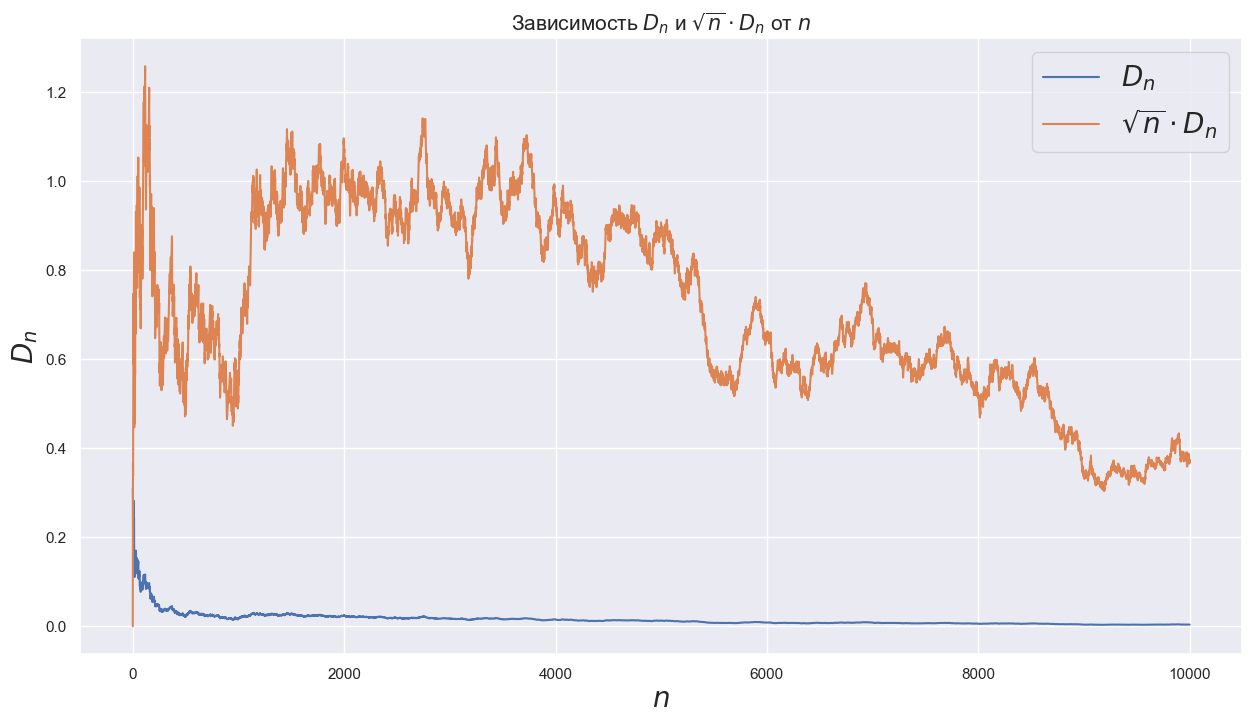

In [133]:
D_n = []
for i in range(N):
    D_n.append(np.max(np.abs(sps.norm.cdf(ecdf[i].x) - ecdf[i].y)))
sqrt_D_n = [D_n[n] * np.sqrt(n) for n in range(N)]
n_grid = np.arange(N)
plt.figure(figsize=(15, 8))
plt.plot(n_grid, D_n, label="$D_n$")
plt.plot(n_grid, sqrt_D_n, label="$\sqrt{n} \cdot D_n$")
plt.title('Зависимость $D_n$ и $\sqrt{n} \cdot D_n$ от $n$', fontsize=15)
plt.xlabel('$n$', fontsize=20)
plt.ylabel('$D_n$', fontsize=20)
plt.legend(fontsize='20')
    

**Вывод:**
По первой группе графиков можно сказать, что с ростом $n$, эмпирическая функция распределения сильнее приближается к истинной функции распределения.
Теорема Гливенко-Кантелли утверждает, что $D_n$ сходится к 0 почти наверно при $n$ стремящемся к $\infty$. Синия линия на графике соответсвует этой теореме.

### Задача 5

Оказывается, нельзя оценивать распределения оценок на глаз простым всматриванием в графики! Поэтому гностики из крепости Нрон изобрели новое заклинание -- QQ-plot. В этой задаче Вам предстоит научиться проверять распределения на принадлежность семействам при помощи этого инструмента.

Сгенерируйте $N_{\text{samples}}=400$ выборок из равномерного распределения $U_{[0, \theta]} \ \theta=1$ размера $N=40$. Моделированием статистик $\hat\theta = 2\overline{X}, \ \theta^* = \frac{n+1}{n} X_{(n)}$ изучите их распределение. Постройте гистограмму получившихся значений каждой из статистик на одном графике, в качестве параметра `bins` функции `plt.hist` передайте значение ниже, а таккже передайте параметр `alpha=0.6`.

In [ ]:
N_samples = 400
N = 40

bins = [i / 40 + 0.8 for i in range(18)]

Промоделируйте статистики $\sqrt{n} (\hat\theta - \theta)$ и $1 - n  (\theta^* - \theta)$. К чему сходятся их распределения с ростом $N$?

На какие распределения похожи получившиеся гистограммы?

**Ответ:**

Вспомните чему равен коэффициент $\sigma(\theta)$ для асимптотиически нормальной оценки $\hat\theta = 2\overline{X}$ для параметра $\theta$ равномерного распределения в формуле
$$
\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}} \xrightarrow{d} N(0, 1)
$$.

**Ответ**:

Посчитайте статистику
$$\sqrt{n}\frac{\left(\hat\theta - \theta\right)}{\sqrt{\sigma(\theta)}}$$ для каждой выборки. Передайте получившиеся значения в переменную `theta_norm`. И запустите ячейку снизу.

Для быстрой проверки гипотезы о том, что выборка принадлежит какому-либо распределению часто используется инструмент под названием `QQ-plot` (первые буквы означают `Quantile`). На нем по оси $x$ отложены теоретические значения квантиля, а по оси $y$ -- квантили тестируемой выборки. Очевидно, в идеале такие квантили должны совпадать, поэтому на графике можно увидеть красную линию соответствующую графику функции $y = x$.

Сделайте вывод по графику выше. Можно ли утверждать, что выборка взята из нормального распределения?

**Ответ:**

Вернемся к статистике $\theta - n  (\theta^* - \theta)$. Еще раз взгляните на гистограмму, соотвутствующую этой статистике. Попробуйте построить `QQ-plot` для различных распределений (например можно передать в параметр `dist=sps.uniform` в функцию `sm.qqplot` или любое другое из модуля `scipy.stats`). Какое распределение подходит лучше всего?

**Ответ:**

Плохо ли, что оценка $\theta^*$ не асимптотически нормальна? Сделайте вывод о скорости сходимости оценок. Какая из них «выгоднее»?

**Ответ:**

# Задача 6

Эта задача проспонсирована великим магистром гнозиса Шабановым Дмитрием Александровичем. Когда-то (год назад) люди доказали, что сумма i.i.d. величин с конечной дисперсией в пределе имеет достаточно примитивное распределение.

Так как мы пока не придумали, как применить этот факт, задача предлагается к решению без веских на то причин.

В теорвере была задача, что для любого распределения с дисперсией и для любого $x$ у последовательности $P(\sum \xi_i \leq x)$ есть предел и он равен 0, 1 или 1/2. Проверьте это утверждение моделированием для хотя бы 3 распределений и 5 различных $x$. Выясните, когда предел принимает какое значение. Решите задачу (теоретически) и сформулируйте теорему о том, когда какой предел реализуется.

Важно: необходимо отыскать все три случая значения предела.

Комментарий: 5 баллов тем, кто найдёт хотя бы 2 из 3 случаев значений предела и опишет их. 10 баллов за все три случая. +5 баллов за теорему с доказательством.

**Перед отправкой нажмите `Restart and run all`**. Проверьте, что все работает без ошибок.